# *In silico* color mixing and optimization

This is the first full color mixing exercise in the AI-orchestrated self-driving labs (47332) course. 

In this exercise, you will explore the `SilicoPumpController` python class, which is a digital version of the `PumpController` you saw before. You will also get familiarized with common optimizers. You should by now know to basic principles of optimizers and some standard ones.

With this digital (or **in silico**) version, you can experiment with your code prior to deploying it on the actual pumpbot. Therefore, you should experience that code produced in this exercise will be very useful and easy to transfer to later exercises involving the robot. Towards the end of the course, you will also use the *in silico* model in combination with the pumpbot for improved performance.

## Exercise 1: Get started with `SilicoPumpController`

Before we dive in, let us import necessary packages for use of the `SilicoPumpController`. These include the controller itself, the a visualization function, and numpy and matplotlib packages.

In [9]:
from pump_controller import SilicoPumpController, visualize_rgb
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pump_controller'

We strongly recommend you to read more about different classes, methods and functions in the `pump_controller` module. We have 

* `PumpController` class
* `SilicoPumpController` class
* `read_logfile()` function
* `get_serial_port()` function
* `list_serial_ports()` function
* `visualize_candidates(data_df)` function 
* `visualize_rgb(mixture, rgb, pump_controller, target, score)` function

A detailed documentation is found module [here](https://www.student.dtu.dk/~s193903/47332/).

The silicobot, an instance of `SilicoPumpController`, is initialized with the standard deviation of noise, `noise_std`. We initialize it with a noise value of 3, meaning that your measurements will not always be the same but contain some noise. 

Notice that when ou instantiate a silicobot, you will also generate a file with current timestamp under the *logs* folder in your current directory. All the colors you mix will be stored here!

In [3]:
silicobot = SilicoPumpController(noise_std = 3)

For the main exercise of the course, you will be given a target color that you are tasked to match by mixing red, green, blue, and yellow. You will not know the components of the target color that you want to match, but can only measure its color. 

For the silico case, you can create your own target color, either by specifying what the target color is or by simulating the mixing of red, green, blue, and yellow. We will demonstrate how to do the latter, which is done by using the `change_target` function of the silicobot. This function mixes a color with the given amounts of red, green, blue, and yellow, and stores that color. 

In [24]:
input_volumes = [0.1, 0.2, 0.3, 0.4]
silicobot.change_target(input_volumes)

Silico target changed to [125.31246956 147.09547757  77.74341755]. Created by [0.1, 0.2, 0.3, 0.4].


array([125.31246956, 147.09547757,  77.74341755])

Both the amounts of R, G, B, Y colorants and the target color mixture are stored in `silicobot.target_mixture` and `silicobot.target_color`. You can see them by running the command below.

In [11]:
print(f"Input volumes [R,G,B,Y] of the target color is: {silicobot.target_mixture}")
print(f"RGB of the target color is: {silicobot.target_color}")

Input volumes [R,G,B,Y] of the target color is: [0.1, 0.2, 0.3, 0.4]
RGB of the target color is: [130.68169972 153.50344847  76.67888686]


Now to the fun part! 

You can mix a new color using the `mix_color` method in `SilicoPumpController` with the amounts of R, G, B, Y you decide. The `mix_color` function mixes the color, measures it and logs it as well. 

Let's mix some colors using the silicobot. Feel free to change the values specified in the `input_volumes`. 

In [25]:
input_volumes = [0.4, 0.3, 0.2, 0.1]
measured_color = silicobot.mix_color(input_volumes)

print(f"Measured Color: {measured_color}")
print(f"Target Color: {silicobot.target_color}")

Measured Color: [131.26595552 100.85491063  51.41196281]
Target Color: [125.31246956 147.09547757  77.74341755]


We can now compare the color you just mixed with the target color using the `visualize_rgb` function. There are several components in the visualization:

* The outer-most ring shows the color mixture that you used to mix the color. 
* The large ring shows that color that you actually mixed
* The inner circle shows the target color. 
* The number in the middle is the score (you don't have that yet). 

If you just want your mixed color, simply set the `target` and `score` properties to `None`.

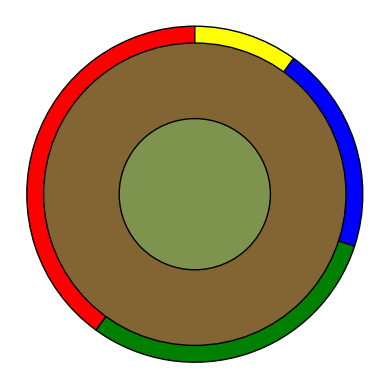

In [26]:
visualize_rgb(mixture = input_volumes,
              rgb = measured_color,
              pump_controller = silicobot,
              target = silicobot.target_color,
              score = None
              )

You are encouraged to repeat the steps above to get a sense of how these tools work. In particular, monitor the log files and generate few different colors. Since you have introduced noise in your silicobot, mixing the same ratios of R, G, B, Y, do not yield exactly the same color. Try mixing the same color multiple times and see deviation in the resulting colors.  

As an example, the code below mixes the same color multiple times - an attempt at equal parts red and yellow - and show you the difference.

Mix 0 = [255.         130.21789651   0.        ]
Mix 1 = [250.0247596  127.5165673    0.62305085]
Mix 2 = [249.13027198 128.47473138   5.46947297]
Mix 3 = [251.60031603 124.33404689   0.        ]
Mix 4 = [250.72668685 131.99508001   3.21172363]
Mix 5 = [254.95521589 126.85341264   0.        ]
Mix 6 = [255.        131.9432038   0.       ]
Mix 7 = [254.42077298 131.30300473   0.51722967]
Mix 8 = [254.90372763 130.19859687   0.        ]
Mix 9 = [255.         123.30488159   3.37745528]


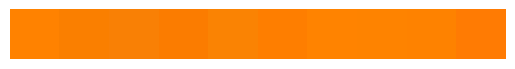

In [28]:
mixed_colors = []
input_volumes=[1.0, 0.0, 0.0, 1.0]
for n in range (10):
    color = silicobot.mix_color(input_volumes)
    print(f'Mix {n} = {color}')
    mixed_colors.append(color)

plt.axis('off')
plt.imshow(np.array([mixed_colors], dtype=np.uint8))

Now, it is your turn to shine. 

Use the below cells to experiment with the `SilicoPumpController` and insert more if needed. 
Make a figure like the one produced by the cell above, but instead of 10 shades of orange, make a rainbow.

In [ ]:
# my_mixer = SilicoPumpController(...

## Exercise 2: Difference from target

Next up, we will be comparing the mixed color and target color. We set the target color and assign it to our silicobot. 

In [30]:
target_color = [220, 141, 50]

silicobot_w_target = SilicoPumpController(noise_std = 3)
silicobot_w_target.target_color = target_color

print(f"Target color is set to {silicobot_w_target.target_color}")

Target color is set to [220, 141, 50]


Let's mix some colors and visualize the mixture and target. 

Mix = [  0.         255.           1.35875692], Target = [220, 141, 50]


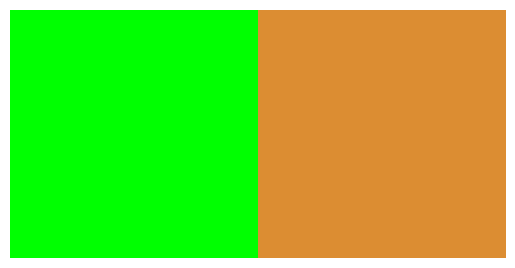

In [41]:
input_volumes = [0., 1., 0., 0.]
color = silicobot_w_target.mix_color(input_volumes)
target = silicobot_w_target.target_color
print(f"Mix = {color}, Target = {target}")
plt.axis('off')
plt.imshow(np.array([[color,target]], dtype=np.uint8))

It is evident that the mixed color and the target color are very different. But **how** different are they?

To answer this, **you** will now write a function that takes the color (r, g, b) and target (r, g, b) as inputs 
and returns some quantitative measure for the difference. 
To get you started, you can get inspiration from the cell below, which contains a function that takes (r, g, b) tuples 
(or lists, arrays, etc.) as `input_color1` and `input_color2` and returns the squared value of the red channel 
of `input_color1`, $\mathrm{red}^2$ -- a **very poor** measure for the difference between the two colors across all channels. 
Try making a function that returns the root summed squared error for each of the r, g, b channels, 
$\sqrt((\Delta r)^2+(\Delta g)^2+(\Delta b)^2)$

In [42]:
def red_squared(input_color1, input_color2):
    r_color, g_color, b_color = input_color1[0], input_color1[1], input_color1[2]
    red2 = r_color**2
    return red2
    
red_squared((68, 216, 5), (68, 216, 5))

4624

In [ ]:
# def color_difference():
#     ...

Calculate the difference score for a few data points and store them in a list following the example below but using you own "score" function (which is often referred to as loss function) and mixing color combinations of your own choice.

Run the below cell a few times with different `input_volumes` to generate some data points. Edit such that you use your own score function.

In [43]:
# run a handful of times with different color
input_volumes = [0.5, 5, 5.5, 0.5]
color = silicobot_w_target.mix_color(input_volumes)
target = silicobot_w_target.target_color
score = color_difference(color, target)  # replace with your function
plt.axis('off')
plt.imshow(np.array([[color, target]], dtype=np.uint8))

print(f"color difference score = {score}")

NameError: name 'color_difference' is not defined

We will now show you how to visualize the data you have generated. 

The `pump_controller` module comes with two useful functions:

* `read_logfile()` function that loads the data from the logfile
* `visualize_candidates()` function that visualize the measurements you have recorded in the log file.

Let's start by loading these two functions.

In [44]:
from pump_controller import read_logfile, visualize_candidates

The log file contains mixture of the samples (amounts of red, green, blue, and yellow in the mix), color measurement of the samples, mixture of the target, and color measurement of the target. Let's load the log file and display it by running the cell below.

In [45]:
logs = read_logfile(silicobot_w_target.log_file)
logs

,mixture,measurement,target_mixture,target_measurement
0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 254.30264997750228, 3.8185773576082918]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
1,"[0.0, 1.0, 0.0, 0.0]","[0.5992741132278881, 255.0, 0.0]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
2,"[0.0, 1.0, 0.0, 0.0]","[3.961943452388346, 254.18435690462695, 5.4310...","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
3,"[0.0, 1.0, 0.0, 0.0]","[0.0, 253.82000861465002, 1.0763592287356398]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
4,"[0.0, 1.0, 0.0, 0.0]","[0.0, 254.26287156116462, 5.294860905782642]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
5,"[0.0, 1.0, 0.0, 0.0]","[0.0, 255.0, 0.0]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
6,"[0.0, 1.0, 0.0, 0.0]","[0.0, 255.0, 0.0]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
7,"[0.0, 1.0, 0.0, 0.0]","[0.1497159501802275, 255.0, 0.0]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
8,"[0.0, 1.0, 0.0, 0.0]","[0.237036516702746, 253.88315272101332, 0.0]","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"
9,"[0.0, 1.0, 0.0, 0.0]","[4.174752570778932, 254.43040817486218, 0.9634...","[0.25, 0.25, 0.25, 0.25]","[220.0, 141.0, 50.0]"


Notice that the log file has the mixture of the target set to its default value of [0.25, 0.25, 0.25, 0.25]. This is happening since we specified the target color directly without specifying the mixture of the target.

To visualize all the samples we have tested so far, we use the `visualize_candidates` function. We call them candidates since we are choosing the best sample out of the them, and all of the mixtures we have tested are considered to be the candidates of the optimal mixutre. The visualization function requires the color difference score, which is not recorded in the log file. Therefore, we will calculate scores of each candidate using the `color_difference` function you have written. 

Now, let's run the code below to visualize the data you just generated. 

In [46]:
logs['score'] = [color_difference(logs['measurement'][i], logs['target_measurement'][i]) for i in range(len(logs))]
visualize_candidates(logs)

NameError: name 'color_difference' is not defined

Looks pretty cool, right? We will be using these tools to find the mixture that best matches our target color. 


## Exercise 1.3: Optimization

As you now know how to use the color mixer and calculate a difference score, we will use common optimizers find a way to mix the target color. Start by loading in the scipy module.

In [ ]:
from IPython import display
from scipy.optimize import minimize

The SciPy minimize function will seek to determine that input parameters which minimize the 
output of a given function. We first have to make such a function. 
For simplicity, make it such that it takes only one input argument (multiple keyword arguments are ok). 
Before trying with the color mixer, try to optimize a very simple function as the one below. 

In [ ]:
def parabola_4d(func_input):
    """ input is of format [x, y]"""
    return func_input[0]**2 + func_input[1]**2 + func_input[2]**2 +  func_input[3]**2

Set the initial guess, `x0`.

In [ ]:
x0 = [2, -4, 5, 3]

There are countless different optimizers available. 
The SciPy package has some of the more common ones [readily available](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). 
No two optimizers are the same, and they excel at different tasks. 
You will use the [conjugate gradient optimizer](https://en.wikipedia.org/wiki/Conjugate_gradient_method) in this exercise 
but we encourage you to experiment with other optimizers in the SciPy package.

Try experimenting the values of  `eps` and `gtol`.

In [ ]:
res = minimize(parabola_4d, x0, method='CG', options={'disp': True, 'eps': 0.01, 'maxiter': 3, 'gtol': 1}) 
res.x

The last line are the input values that give the minimum output value. We know the correct answer is `[0, 0, 0, 0]`.

However, things often do not go so smooth for us when trying to optimize the color mixing, and we will run into issues. What are some of the issues and how do they cause trouble? 

Let's start by removing one of the issues (noise in the color mixing) by using the mixer below. Note that we set `noise_std` to zero, such that there is no noise.

In [ ]:
target_volumes = [0.1, 0.2, 0.0, 0.4]
silicobot_opt1 = SilicoPumpController(noise_std = 0)
silicobot_opt1.change_target(target_volumes)

Write a function where a color is mixed with `silicobot_opt1` and a score is calculated. 
Make sure the function will have its lowest value when the difference between the mixed color and target color is 
as small as possible. Use the following snippet for inspiration. We have included the print statement so that you can see the input volumes during the optimization process.

In [ ]:
def find_score_from_color(input_volumes):
    """Your awesome function"""
    print(f"input volumes : {input_volumes}")
    # mix new color based on the input volumes and calculate its score 
    return score

Let's start the optimization process by providing the starting point `x0` and minimize the score using the conjugate gradient optimizer.

In [ ]:
input_volumes = [0.1, 0.1, 0.1, 0.1]

In [ ]:
res = minimize(find_score_from_color, input_volumes, method='CG', options={'disp': True, 'eps': 0.01, 'maxiter': 3, 'gtol': 1}) 
print(res)

Do you see any negative number (volume) as inputs? If so, it is clearly a problem. Our pump_controller is smart enough to convert a negative volume to zero. However, the it is clearly not the desired behavior of the optimizer. We need to set bounds of our input fields, such that the values stay within the specified range.

We can solve this issue by changing our optimizer to `L-BFGS-B`, which accept bounds. Give the function a starting point and run the minimization. Again, you should try different values of `eps` and `gtol` and possibly also `maxiter` this time.

Note that the log file keep appending new results to the same log file. You can create a new log file by initializing the controller again.

In [ ]:
res = minimize(find_score_from_color, input_volumes, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 4, 'gtol': 0.1})
print(res)

You cannot see how the optimization is progressing. Load the log file and visualize the candidates as shown in Exercise 1.2. 
Below are some cells for you to play with. Add more as needed.

In [ ]:
# place for your code

In [ ]:
# place for your code

In [ ]:
# place for your code

## Exercise 1.3: Optimization by mimicking the real pumpbot

If you are gettting some good plots and have gotten a good feel for how different optimization methods and parameters work, you are ready to simulate the real pump bots. What do we mean by simulating the real pump bot? We mean adding two things to our simulation:

1. Add noise to the `SilicoPumpController`
2. Inject the ways to pause the optimization sequence. 

The reason for adding the noise is quite simple. Both the pumps and color sensor in your robot is not perfectly accurate, meaning that the color measurement you get is not exactly the same if you mix the same sample and measure its color multiple times. This noise affects your optimization performance, and we should include the noise in our simulation. 

The second reason is more practical. As you have probably seen in the log files for some of your optimizations so far, the optimization steps can go up to several dozens or even more than a hundred. In this case, you will need to refill your color and water holder, or empty the drain container. For this reason, you will want the optimizer to pause once in a while, so you have time to check the status of the robot during the optimizaiton sequence. 

Let's load the `SilicoPumpController` with noise.

In [ ]:
target_volumes = [0.1, 0.2, 0.0, 0.4]
silicobot_opt2 = SilicoPumpController(noise_std = 3)
silicobot_opt2.change_target(target_volumes)

Input your `find_score_from_color` function in the cell below, update it to use the new mixer renaming it `find_score_from_color2`, and run the cell.

In [ ]:
# def find_score_from_color2(input_volumes):
#     ...

It is possible to force the `find_score_from_color2` function to raise an error after more than 5 function calls, but it is better to set a maximum number of function evaluations in the optimizer if it allows it. Here, `maxfun` (what a name!) is given.

In [ ]:
res = minimize(find_score_from_color2, input_volumes, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 3, 'gtol': 0.1, 'maxfun': 5})
res

Use the cell below to load the log file and plot the optimization process.

Not surprisingly, 5 function evaluations is not enough to get anywhere. We can even see that the optimizer actually makes more than 5 evaluations. To prevent this from happening, we force the `find_score_from_color2` function to wait for our go-ahead every time 5 function evaluations have been made. Go ahead finish the function.

In [ ]:
func_calls=[0]

def find_score_from_color2(input_volumes, func_calls=func_calls):  
    print(f"input volumes : {input_volumes}")
    # mix new color based on the input volumes and calculate its score 
    # ...
    # ...
    
    # Optional: Load data and visualize candidates. Uncomment the line below to clear output each time
    # display.clear_output(wait=True)

    func_calls[0] += 1
    if func_calls[0] % 5 == 0:
        input('Optimization paused. Check your setup and press Enter.')
    return score

It is not all that pretty, but it works. Try it out. Note that with a noisy mixer, getting `eps` right is especially important. 

In [ ]:
func_calls = [0]
input_volumes = [0.1, 0.1, 0.1, 0.1]

res = minimize(find_score_from_color2, input_volumes, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 5, 'gtol': 0.1, 'maxfun':100})
res

If you think this has been a piece of cake and you are wondering what you should do next, now would be a great time for you to start experimenting with alternative "score" functions and [other optimizers](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). If you feel like you are already struggling, no worries! You did well to get this far. 

This ends todays exercise. Good job! 